<a href="https://colab.research.google.com/github/ayshahaneena/Tik-Tok-sentiment-Analysis/blob/main/TikTok_Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sentiment analysis is a natural language processing technique used to determine the emotional tone behind a body of text. It helps in understanding the sentiment expressed, such as positive, negative, or neutral.

## Importing Libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import SnowballStemmer
import string
import re
import numpy as np
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Loading The Data


In [2]:
df = pd.read_csv('/content/tiktok_google_play_reviews.csv')

In [3]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,No words,5,0,27.1.3,2022-11-29 21:55:37,NaN,NaN
1,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,Great fun app so far!,5,0,NaN,2022-11-29 21:55:04,NaN,NaN
2,96618aa1-31e5-4259-8649-89b75d962f00,Rylee Maher,https://play-lh.googleusercontent.com/a/ALm5wu...,The app would get a higher rating but I litera...,1,0,27.1.3,2022-11-29 21:54:48,NaN,NaN
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0,NaN,2022-11-29 21:54:35,NaN,NaN
4,8e68c5cd-b12a-4206-a8da-6bfdbff44ae3,Loveness Malenga,https://play-lh.googleusercontent.com/a-/ACNPE...,Pictures and record,5,0,NaN,2022-11-29 21:54:21,NaN,NaN


## EDA

In [4]:
df = df[['content','score']]
df.head()

,content,score
0,No words,5
1,Great fun app so far!,5
2,The app would get a higher rating but I litera...,1
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5
4,Pictures and record,5


In [5]:
df.shape

(9773, 2)

In [6]:
df.isnull().sum()

content    0
score      0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isna().sum()

content    0
score      0
dtype: int64

In [9]:
stopwords = set(stopwords.words('english'))

In [10]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [11]:
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '' , text)
  text = re.sub('https?://\S+|www\.\S+', '' , text)
  text = re.sub('<.*?>+', '' , text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '' , text)
  text = re.sub('\n', '' , text)
  text = re.sub('\w*\d\w*', '' , text)
  text = [word for word in text.split(' ') if word not in stopwords ]
  text = " ".join(text)
  stemmer = SnowballStemmer('english')
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = " ".join(text)
  return text


In [12]:
df['content'] = df['content'].apply(clean)

In [13]:
df.head()

,content,score
0,word,5
1,great fun app far,5
2,app would get higher rate liter cant sign seco...,1
3,wish could give percent rate love 💕 😘,5
4,pictur record,5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9773 entries, 0 to 9772
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  9773 non-null   object
 1   score    9773 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 152.8+ KB


## Ratings Visualization

In [15]:
ratings = df['score'].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
fig = px.pie(df , values = quantity , names = numbers,hole= 0.5)
fig.show()


# WordCloud

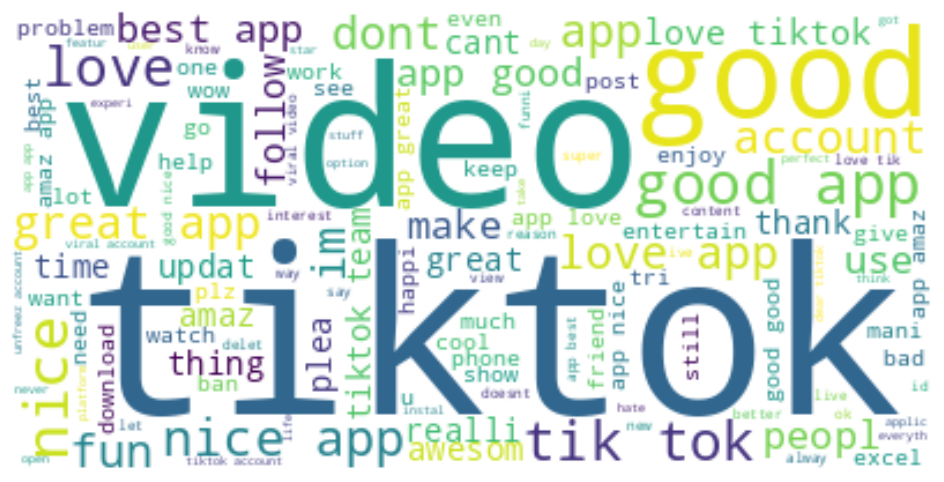

In [16]:
text = " ".join( i for i in df.content) # concatenating all the text from a column in a DataFrame into a single string
stopwords = set(STOPWORDS)
plt.figure(figsize=(12,6))
wordcloud = WordCloud(stopwords=stopwords , background_color='white').generate(text)
plt.imshow(wordcloud , interpolation= 'bilinear')
plt.axis('off')
plt.show()

# Positive , Negative and Neutral

* VADER Lexicon: This lexicon is a list of words and their associated sentiment intensity scores.
* The VADER lexicon is essential for the SentimentIntensityAnalyzer class to function. The analyzer uses this lexicon to calculate the sentiment scores for given text inputs.

In [48]:
# Download VADER lexicon
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [49]:
df['positive'] = [analyzer.polarity_scores(i)['pos'] for i in df['content']]
df['negative'] = [analyzer.polarity_scores(i)['neg'] for i in df['content']]
df['neutral'] = [analyzer.polarity_scores(i)['neu'] for i in df['content']]

In [50]:
new_df = df[['content','positive','negative','neutral']]
new_df.head()

,content,positive,negative,neutral
0,word,0.000,0.00,1.000
1,great fun app far,0.787,0.00,0.213
2,app would get higher rate liter cant sign seco...,0.000,0.07,0.930
3,wish could give percent rate love 💕 😘,0.633,0.00,0.367
4,pictur record,0.000,0.00,1.000


In [51]:

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] > 0.05:    # compound is an Overall sentiment score ranging from -1 (most negative) to +1 (most positive)
        return 'Positive'
    elif scores['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

sentiments = [get_sentiment(text) for text in df['content']]


In [54]:
get_sentiment('im getting a lot of fun ,with this ')

'Positive'

In [55]:
get_sentiment('The curated nature of content on TikTok can distort users perceptions of reality,often exacerbating feelings of inadequacy, anxiety, and depression')


'Negative'

In [56]:
get_sentiment('this is just waste of time')

'Negative'

In [57]:
get_sentiment('what is this')

'Neutral'

In [60]:
get_sentiment('tiktok is nothing')

'Neutral'

## Positive Reviews in WordCloud

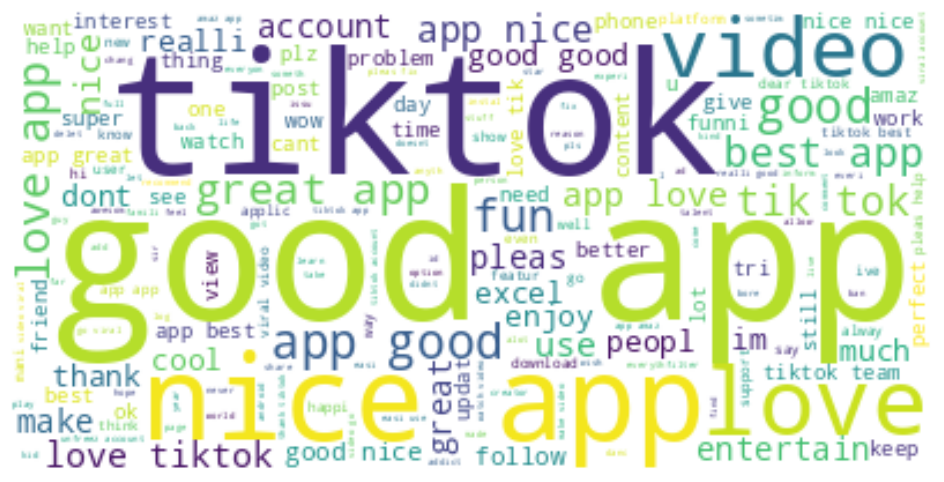

In [20]:
positive_text = " ".join([ i for i in df['content'] [df['positive'] > df['negative']]]) # concatenating all the text from a column in a DataFrame into a single string
stopwords = set(STOPWORDS)
plt.figure(figsize=(12,6))
wordcloud = WordCloud(stopwords=stopwords , background_color='white').generate(positive_text)
plt.imshow(wordcloud , interpolation= 'bilinear')
plt.axis('off')
plt.show()

## Negative Reviews in WordCloud

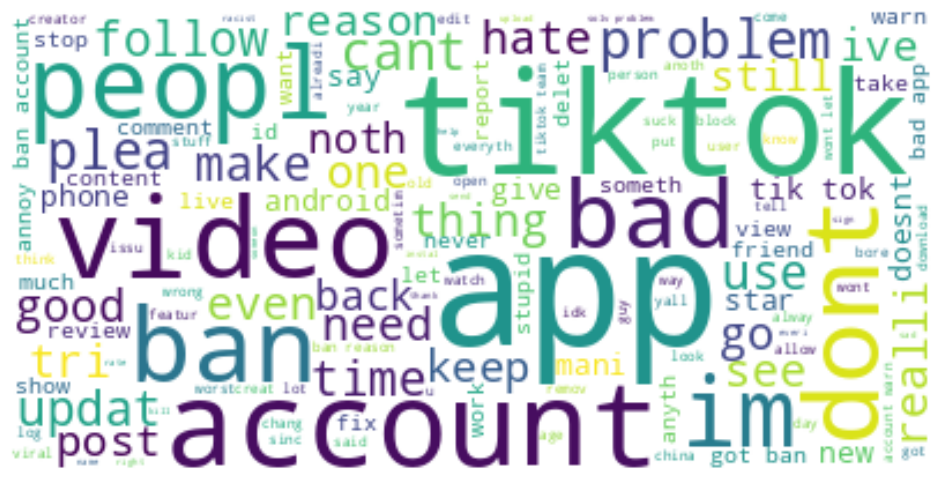

In [21]:
negative_text = " ".join([ i for i in df['content'] [df['negative'] > df['positive']]]) # concatenating all the text from a column in a DataFrame into a single string
stopwords = set(STOPWORDS)
plt.figure(figsize=(12,6))
wordcloud = WordCloud(stopwords=stopwords , background_color='white').generate(negative_text)
plt.imshow(wordcloud , interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [32]:
a = sum(df['positive'])
b = sum(df['negative'])
c = sum(df['neutral'])

print('Positive Reviews: ',round(a,2))
print('Negative Reviews: ',round(b,2))
print('Neutral Reviews: ',round(c,2))

Positive Reviews:  4116.67
Negative Reviews:  339.42
Neutral Reviews:  5121.91


# pie chart

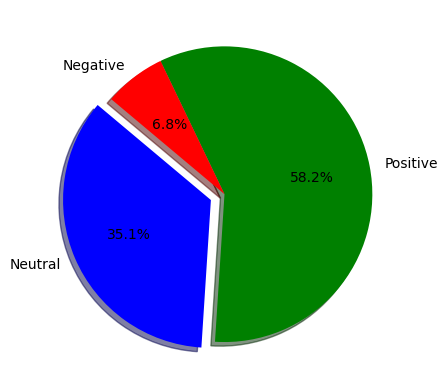

In [66]:
# Count sentiment categories
from collections import Counter
sentiment_counts = Counter(sentiments)

# Plot
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
colors = ['blue', 'green', 'red']
explode = (0.1, 0, 0)  # explode 1st slice for emphasis

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%',  startangle=140 , shadow=True)
plt.show()

In [61]:
sentiment_counts

Counter({'Neutral': 3429, 'Positive': 5683, 'Negative': 661})